<a href="https://www.kaggle.com/code/hebaatef/dogs-vs-cats-classification-using-keras-cnn?scriptVersionId=91064213" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


# **Import Libraries**

In [2]:
# For Preparing Data
import os
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
import random

# For Building Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# For Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# For Prepare Training & Validating data
from sklearn.model_selection import train_test_split

# For Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

import numpy as np

# **Define Constants**

In [3]:
# For Preparing Data
DATA_DIR = "../data"
TRAIN_DIR = "../data/train/"
TEST_DIR = "../data/test1/"

ZIP_TRAIN_DIR = "../input/dogs-vs-cats/train.zip"
ZIP_TEST_DIR = "../input/dogs-vs-cats/test1.zip"

# For Building Model
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 3

# For Fitting Model
FAST_RUN = True

# 1. Categorize Input Data

Create a directory to unzip the training & testing data both in different directories. But first check if that directory already exists

Then unzip the data into its directory

In [4]:
# check if the directories already exist then dont make them
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)
    
    with ZipFile(ZIP_TRAIN_DIR) as zf:
        zf.extractall(DATA_DIR)
    
    with ZipFile(ZIP_TEST_DIR) as zf:
        zf.extractall(DATA_DIR)

Have a look inside the folders we created

In [5]:
for dirname, _, filenames in os.walk(DATA_DIR):
    for index, filename in enumerate(filenames):
        if index < 3:
            print(os.path.join(dirname, filename))
            
        else:
            print("** **")
            break

../data/test1/10435.jpg
../data/test1/6790.jpg
../data/test1/4644.jpg
** **
../data/train/dog.890.jpg
../data/train/dog.1178.jpg
../data/train/dog.7845.jpg
** **


Now, let's prepare our training data into data frame

Giving a dog value of 1 and a cat value of 0

In [6]:
train_files = os.listdir(TRAIN_DIR)
categories = []

for file in train_files:
    category = file.split('.')[0]
    
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)
        
df = pd.DataFrame({
    'filename': train_files,
    'category': categories
})

Have a look of the data frame

In [7]:
df.head()

,filename,category
0,dog.890.jpg,1
1,dog.1178.jpg,1
2,dog.7845.jpg,1
3,dog.4632.jpg,1
4,cat.3660.jpg,0


see the data charts of data frames

<AxesSubplot:>

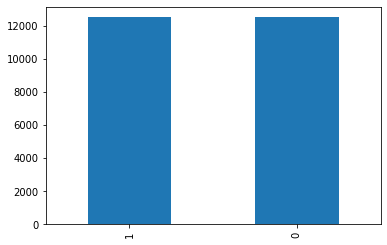

In [8]:
df['category'].value_counts().plot.bar()

see a sample image

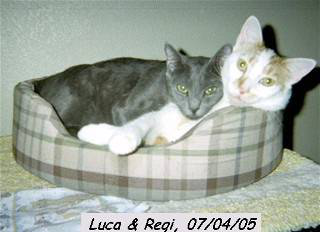

In [9]:
# using PIL
img_path = os.path.join(TRAIN_DIR, random.choice(train_files))
img = Image.open(os.path.join(img_path))
display(img)

# using matplot
# img = load_img(img_path)
# plt.imshow(img)

# 2. Build Model

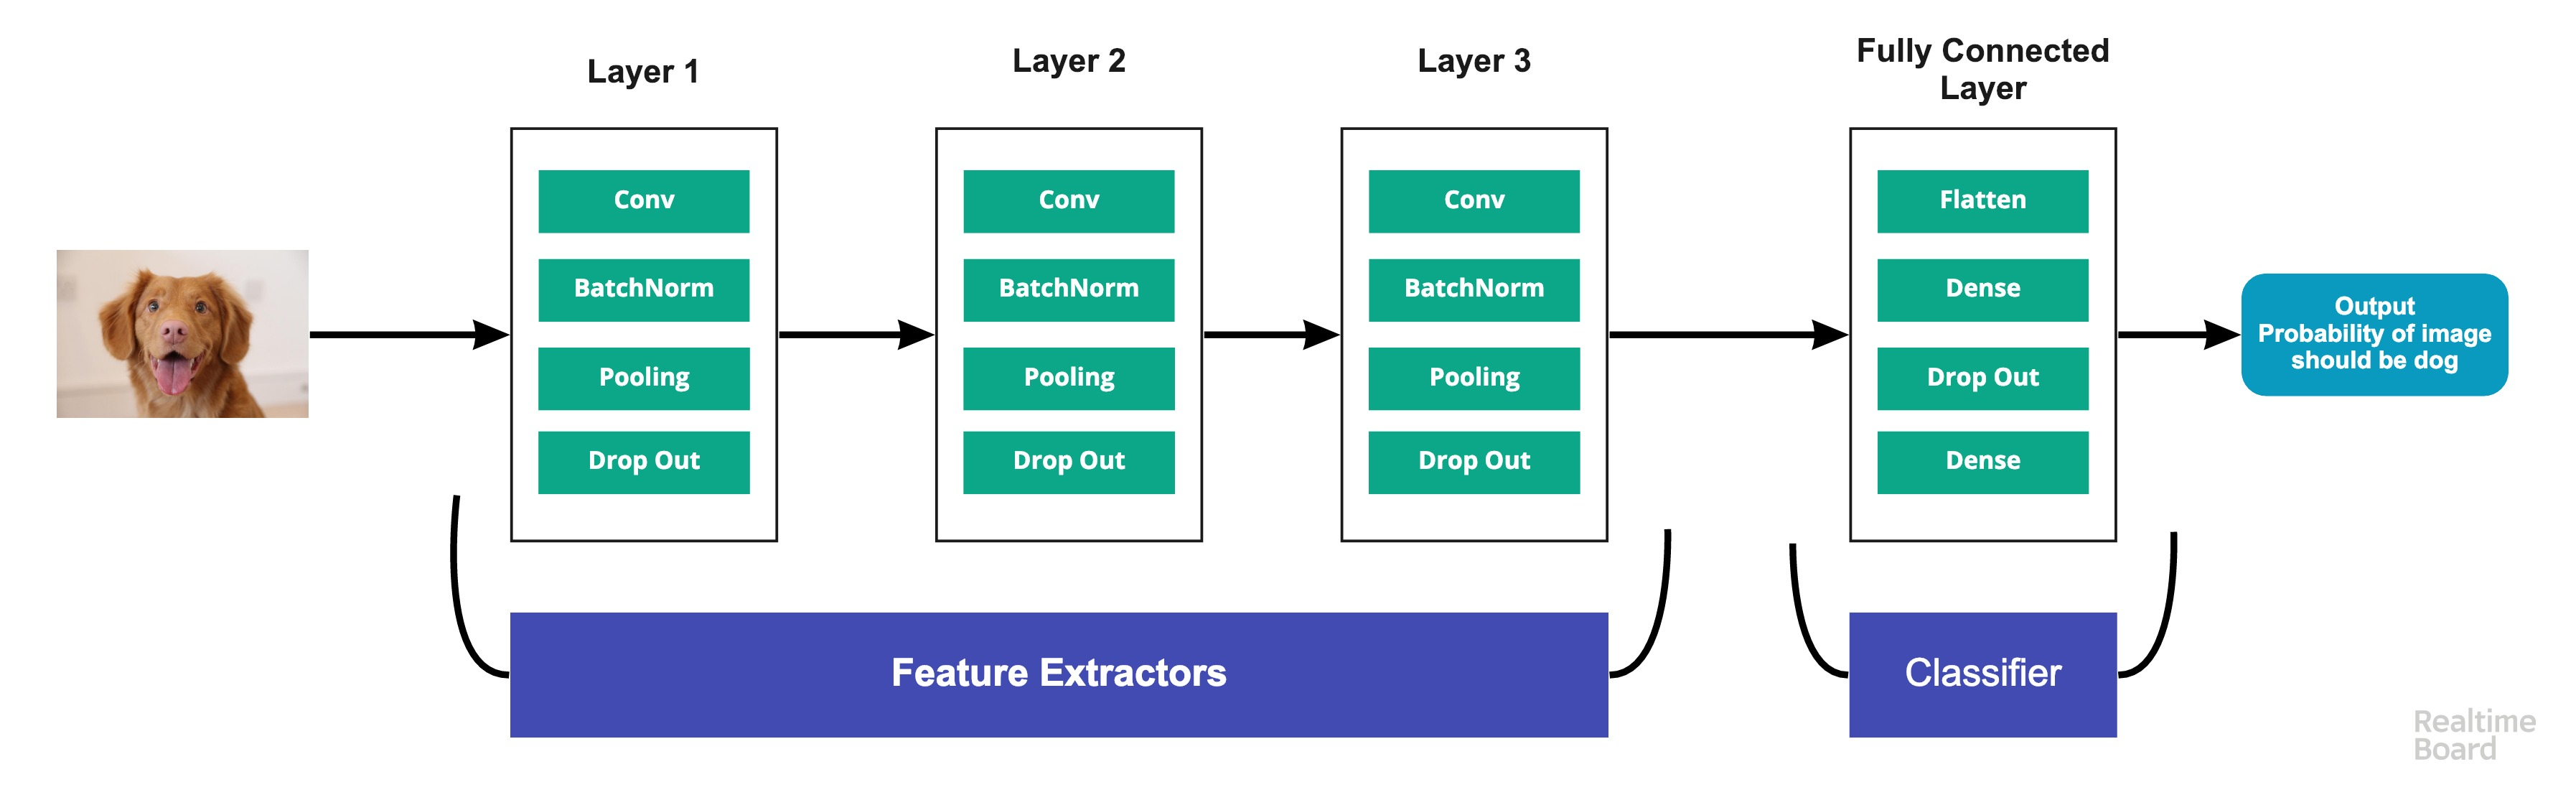

Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer.

Output Layer: It is the predicted values layer.

In [10]:
def add_FE_layer(model, num_filters, kernel_size, _activation, _input_shape, _pool_size, drop_rate):
    if _input_shape is None:
        model.add(Conv2D(num_filters, kernel_size, activation=_activation))
    else:
        model.add(Conv2D(num_filters, kernel_size, activation=_activation, input_shape=_input_shape))
        
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=_pool_size))
    model.add(Dropout(drop_rate))
    return model

model = Sequential()
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
model = add_FE_layer(model, 32, (3, 3), 'relu', input_shape, (2, 2), 0.25)
model = add_FE_layer(model, 64, (3, 3), 'relu', None, (2, 2), 0.25)
model = add_FE_layer(model, 128, (3, 3), 'relu', None, (2, 2), 0.25)

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

2022-03-23 19:56:05.975842: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

# Callbacks 

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [11]:
early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            factor=0.5,
                                            patience=2,
                                            verbose=1,
                                            min_lr=0.00001)

callbacks = [early_stop, learning_rate_reduction]

# 3. Prepare Training & Validating data

Because we will use image genaretor `with class_mode="categorical"`. 
We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [12]:
df['category'] = df['category'].replace({0:'cat', 1:'dog'})
df.head()

,filename,category
0,dog.890.jpg,dog
1,dog.1178.jpg,dog
2,dog.7845.jpg,dog
3,dog.4632.jpg,dog
4,cat.3660.jpg,cat


Split the input data into training(80%) & validation(20%)

In [13]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

print("before reseting index\n\n", train_df)

# reseting index creates a new column with the old values for the index before reset
# so activating drop=True enables us to remove that column 'index' holding the prev index values
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

before reseting index

             filename category
23311  dog.10381.jpg      dog
23623   dog.1864.jpg      dog
1020    cat.3131.jpg      cat
12645  dog.12317.jpg      dog
1533    dog.2524.jpg      dog
...              ...      ...
21575   cat.5963.jpg      cat
5390   cat.10918.jpg      cat
860     dog.6434.jpg      dog
15795   dog.5945.jpg      dog
23654   dog.1856.jpg      dog

[20000 rows x 2 columns]


In [14]:
print("After reseting index with drop=True\n")
train_df.head()

After reseting index with drop=True



,filename,category
0,dog.10381.jpg,dog
1,dog.1864.jpg,dog
2,cat.3131.jpg,cat
3,dog.12317.jpg,dog
4,dog.2524.jpg,dog


Note: Here is the output if we used drop=False

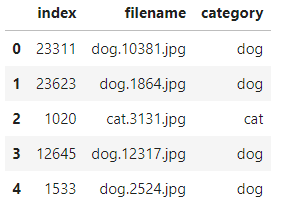

<AxesSubplot:>

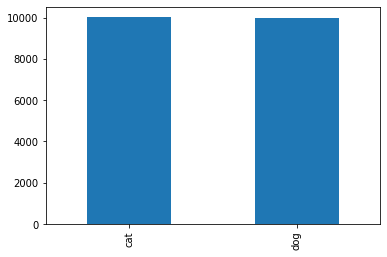

In [15]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

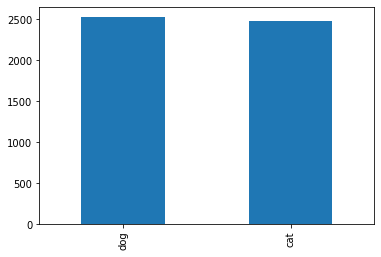

In [16]:
validate_df['category'].value_counts().plot.bar()

define variables

In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

# 4. Data Augmentation

**Training Generator**

In [18]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    TRAIN_DIR,
    x_col='filename',
    y_col='category',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='categorical',
    batch_size=batch_size
    
)

Found 20000 validated image filenames belonging to 2 classes.


**Validation Generator**

In [19]:
validate_datagen = ImageDataGenerator(rescale=1./255)

validate_generator = validate_datagen.flow_from_dataframe(
    validate_df,
    TRAIN_DIR,
    x_col='filename',
    y_col='category',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


**Try the generator**

In [20]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    TRAIN_DIR,
    x_col='filename',
    y_col='category',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='categorical',
)

Found 1 validated image filenames belonging to 1 classes.


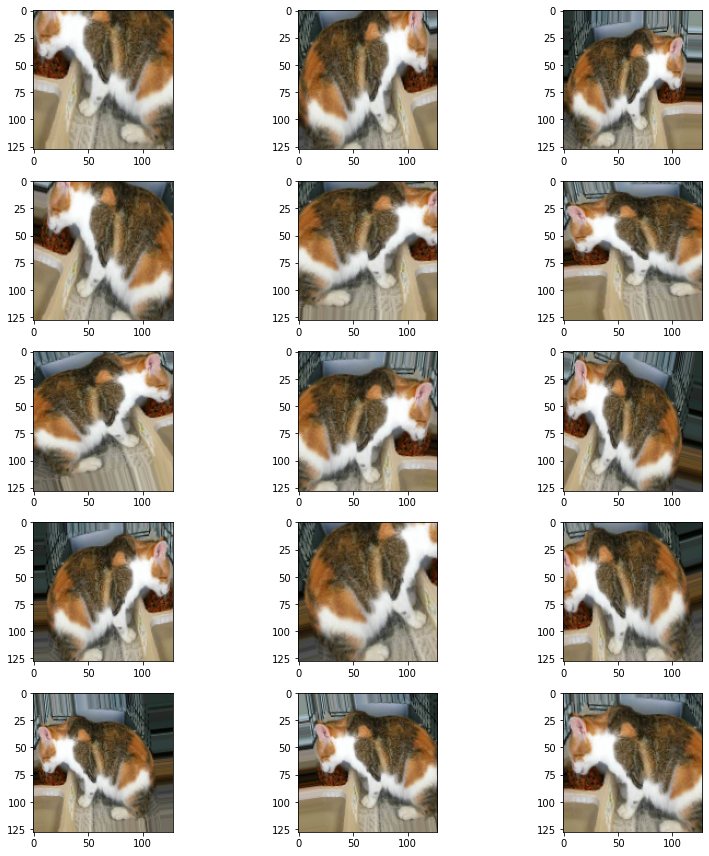

In [21]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 5. Train model

In [22]:
_epochs = 15 if FAST_RUN else 50
history = model.fit(
    train_generator,
    epochs=_epochs,
    validation_data=validate_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

2022-03-23 19:56:11.571889: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
1333/1333 [==============================] - 413s 308ms/step - loss: 1.8345 - accuracy: 0.5957 - val_loss: 0.5963 - val_accuracy: 0.6779
Epoch 2/15
1333/1333 [==============================] - 413s 310ms/step - loss: 0.6420 - accuracy: 0.6728 - val_loss: 0.5490 - val_accuracy: 0.7225
Epoch 3/15
1333/1333 [==============================] - 412s 309ms/step - loss: 0.6134 - accuracy: 0.7062 - val_loss: 0.6342 - val_accuracy: 0.7121
Epoch 4/15
1333/1333 [==============================] - 415s 311ms/step - loss: 0.6091 - accuracy: 0.7153 - val_loss: 0.9998 - val_accuracy: 0.7177
Epoch 5/15
1333/1333 [==============================] - 417s 313ms/step - loss: 0.5731 - accuracy: 0.7382 - val_loss: 0.7731 - val_accuracy: 0.6571
Epoch 6/15
1333/1333 [==============================] - 418s 314ms/step - loss: 0.5571 - accuracy: 0.7484 - val_loss: 0.4554 - val_accuracy: 0.7904
Epoch 7/15
1333/1333 [==============================] - 419s 314ms/step - loss: 0.5497 - accuracy: 0.7561 - val_

# 6. Save Weights

In [23]:
model.save_weights("weights.h5")

# 7. Virtualize Training

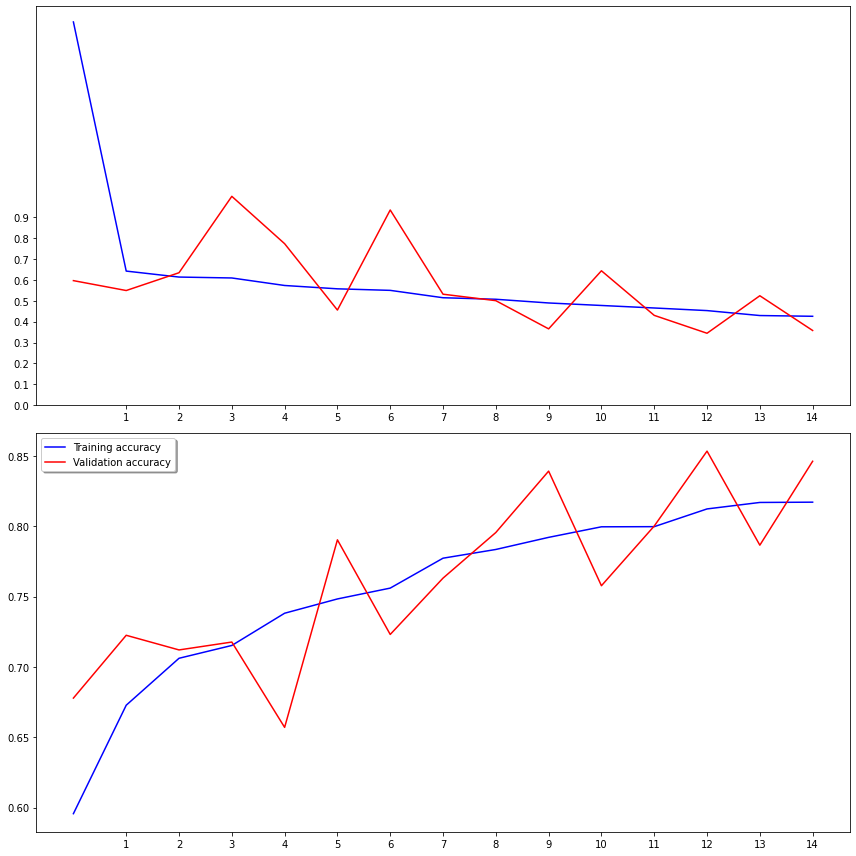

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, _epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, _epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# 8. Prepare Testing Data

In [25]:
test_filenames = os.listdir(TEST_DIR)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

**Create Testing Generator**

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator =  test_datagen.flow_from_dataframe(
    test_df,
    TEST_DIR,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


# 9. Predict

In [27]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [28]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [29]:
lable_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(lable_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [30]:
test_df['category'] = test_df['category'].replace({'dog': 1, 'cat': 0})

# 10. Virtualize Result

<AxesSubplot:>

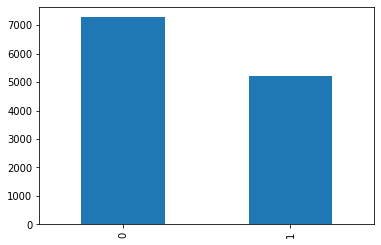

In [31]:
test_df['category'].value_counts().plot.bar()

**See predicted result with images**

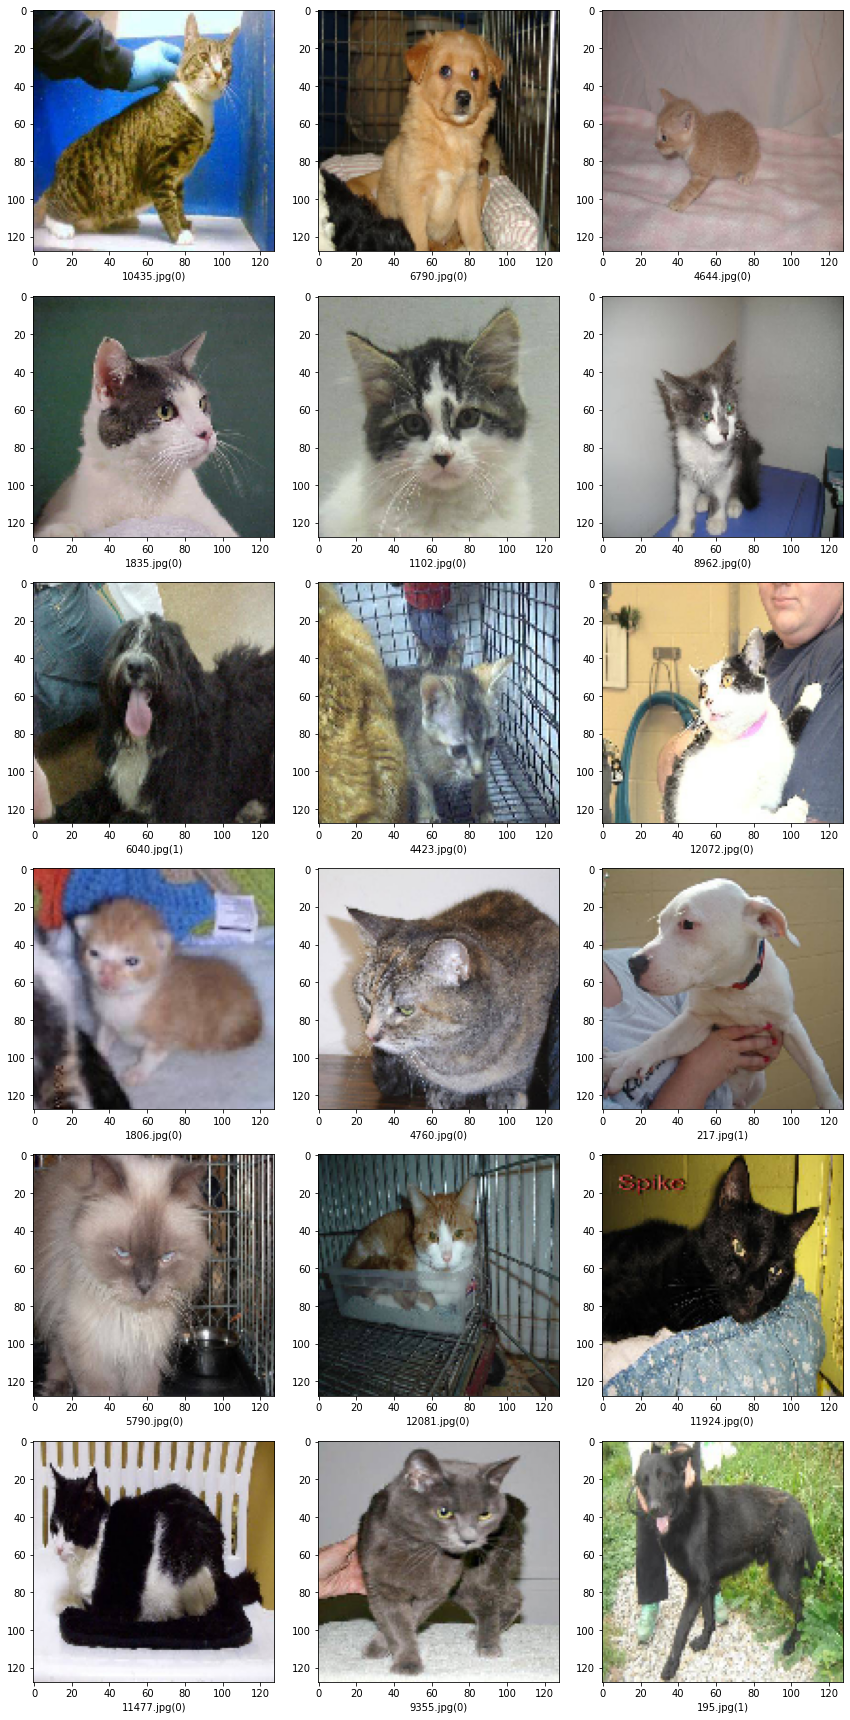

In [32]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(TEST_DIR+filename, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

**Submission**

In [33]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

# References:
Notebook: [link](https://www.kaggle.com/code/uysimty/keras-cnn-dog-or-cat-classification/notebook)

Creating a model: [link](https://pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/)

Cross Entropy Loss Functions: [link1](https://vitalflux.com/keras-categorical-cross-entropy-loss-function/) [link2](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)

Early Stopping: [link](https://keras.io/api/callbacks/early_stopping/)

Reduce Learning Rate: [link](https://keras.io/api/callbacks/reduce_lr_on_plateau/)

sklearn.model_selection.train_test_split: [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

pandas.DataFrame.reset_index: [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

tf.keras.preprocessing.image.ImageDataGenerato: [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

keras.fit() vs keras.fit_generator(): [link1](https://pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/) [link2](https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/)